---
---

# Miniproyecto 1

---
---

Nombre:
----------

Matías Zamorano Goldrine

Puntajes:
-----------

0.- 2 ptos.

1.- 20 ptos.

2.- 15 ptos.

3.- 30 ptos.

4.- 30 ptos.

5.- 3 ptos.

Total: 
-------
100 ptos.

## 0.- Cargar librerías y explicar sus usos (2 ptos.): 

Respuesta:
---
    
    
Empezando por importar las librerías que se van a utilizar, numpy para el trabajo con arrays, pandas para explorar y/o manipular la base de datos, matplotlib junto a seaborn para hacer vizualizaciones de datos y de sklearn la funcion MinMaxScaler para normalizar los datos.

In [84]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler

## 1.- Cargar datasets y explorar los datos. Explicar las características de los dataset (estadísticas, datos Nan, datos únicos, etc.) (20 ptos.):

Apoyarse en la documentación de Pandas https://pandas.pydata.org/pandas-docs/stable/index.html y Seaborn https://seaborn.pydata.org/index.html

Respuesta:
---
    
    
Ahora se cargan los 3 datasets proporcionados por el banco, además con el metodo *head()* se vizualizan las columnas junto a las primeras filas de cada datasets.  

In [85]:
df1 = pd.read_csv('bank-A.csv', sep= ';')
df1.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,day_of_week
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon
1,1536,1536,37.0,management,married,university.degree,no,yes,tue
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN


In [46]:
df2 = pd.read_csv('bank-B.csv', sep= ',')
df2.head()

,Unnamed: 0,id,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,age
0,2292,2292,telephone,may,mon,231,1,999,1,failure,51.0
1,1536,1536,cellular,aug,tue,263,2,999,0,nonexistent,37.0
2,4047,4047,telephone,jun,wed,95,2,999,0,nonexistent,38.0
3,3862,3862,cellular,nov,fri,495,1,3,1,success,52.0
4,1340,1340,cellular,aug,wed,428,4,999,0,nonexistent,NaN


In [86]:
df3 = pd.read_csv('bank-C.csv')
df3.head()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact
0,2292,2292,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,1.4,93.444,-36.1,4.964,5228.1,cellular


Con ello ya podemos notar que hay 2 columnas comunes entres los datasets: Unnamend:0 y ID. Ahora veremos con mas detalle cada columna al utilizar el metodo *info()*, de esta manera podemos el tipo de dato que contiene cada columna y si poseen datos nulos.

In [87]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     int64  
 1   id           50 non-null     int64  
 2   age          42 non-null     float64
 3   job          50 non-null     object 
 4   marital      50 non-null     object 
 5   education    50 non-null     object 
 6   default      50 non-null     object 
 7   housing      50 non-null     object 
 8   day_of_week  42 non-null     object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.6+ KB


In [88]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   50 non-null     int64  
 1   id           50 non-null     int64  
 2   contact      50 non-null     object 
 3   month        50 non-null     object 
 4   day_of_week  42 non-null     object 
 5   duration     50 non-null     int64  
 6   campaign     50 non-null     int64  
 7   pdays        50 non-null     int64  
 8   previous     50 non-null     int64  
 9   poutcome     50 non-null     object 
 10  age          42 non-null     float64
dtypes: float64(1), int64(6), object(4)
memory usage: 4.4+ KB


In [89]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   emp.var.rate    50 non-null     float64
 3   cons.price.idx  50 non-null     float64
 4   cons.conf.idx   50 non-null     float64
 5   euribor3m       50 non-null     float64
 6   nr.employed     50 non-null     float64
 7   contact         50 non-null     object 
dtypes: float64(5), int64(2), object(1)
memory usage: 3.2+ KB


Además se observa que para la df1 tenemos 3 variables numerica y 6 categoricas. En el caso de df2 esta posee 7 variables numericas y 4 categoricas, mientras que df3 solo tiene variables numericas. Respecto a las variables *age* y *day_of_week* son comunes entre df1 y df2, tal que cuando juntemos las bases de datos tenemos que tener eso en cuenta. Continuaremos con un conteo de los valores unicos para las variables de cada base de datos con el metodo *nunique()*

In [90]:
df1.nunique()

Unnamed: 0     50
id             50
age            21
job             8
marital         3
education       7
default         2
housing         3
day_of_week     5
dtype: int64

In [91]:
df2.nunique()

Unnamed: 0     50
id             50
contact         3
month           6
day_of_week     5
duration       49
campaign        7
pdays           2
previous        2
poutcome        3
age            21
dtype: int64

In [92]:
df3.nunique()

Unnamed: 0        50
id                50
emp.var.rate       6
cons.price.idx    10
cons.conf.idx     10
euribor3m         30
nr.employed        7
contact            3
dtype: int64

Con esto podemos aprovechar que las variables *age* y *duration* son las que posee mas datos unicos, por lo que podemos utilizarlas para vizualizar los datos. Para la parte estadistica iniciaremos con el revisar las bases de datos con el *describe()* para las variables numericas.

In [93]:
df1.describe()

,Unnamed: 0,id,age
count,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,40.357143
std,1047.344129,1047.344129,9.084485
min,257.000000,257.000000,27.000000
25%,1553.750000,1553.750000,31.250000
50%,2486.000000,2486.000000,38.000000
75%,3407.000000,3407.000000,48.500000
max,4047.000000,4047.000000,57.000000


In [94]:
df2.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,age
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,42.000000
mean,2461.900000,2461.900000,270.100000,2.280000,979.080000,0.120000,40.880952
std,1047.344129,1047.344129,204.363147,1.917056,140.855671,0.328261,9.292542
min,257.000000,257.000000,68.000000,1.000000,3.000000,0.000000,26.000000
25%,1553.750000,1553.750000,160.250000,1.000000,999.000000,0.000000,33.000000
50%,2486.000000,2486.000000,198.500000,2.000000,999.000000,0.000000,38.000000
75%,3407.000000,3407.000000,303.750000,3.000000,999.000000,0.000000,50.500000
max,4047.000000,4047.000000,1259.000000,12.000000,999.000000,1.000000,57.000000


In [95]:
df3.describe()

,Unnamed: 0,id,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.00000
mean,2461.900000,2461.900000,0.324000,93.588360,-40.062000,3.965080,5181.00800
std,1047.344129,1047.344129,1.392188,0.514534,4.143295,1.532579,57.86105
min,257.000000,257.000000,-3.400000,92.469000,-47.100000,0.697000,5008.70000
25%,1553.750000,1553.750000,-0.100000,93.200000,-42.700000,4.087000,5191.00000
50%,2486.000000,2486.000000,1.100000,93.660000,-41.800000,4.857000,5195.80000
75%,3407.000000,3407.000000,1.400000,93.994000,-36.400000,4.960500,5228.10000
max,4047.000000,4047.000000,1.400000,94.465000,-30.100000,4.968000,5228.10000


Con este analisis ya tenemos infomación estadistica como la media, desviacion estandar, los cuantiles además de los minimos y maximos. Esta ultima información no resultara relevante al momento de normalizar los datos. Para tener un analisis mas completo vamos a incluir las moda junto a varianzas de las variables numericas para las bases de datos df2 y df3

In [96]:
columnas = ["duration", "campaign", "pdays", "previous"]
df2[columnas].var()

duration    41764.295918
campaign        3.675102
pdays       19840.320000
previous        0.107755
dtype: float64

In [97]:
df2[columnas].mode()

,duration,campaign,pdays,previous
0,160,1,999,0


In [98]:
columnas = ["emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m", "nr.employed"]
df3[columnas].var()

emp.var.rate         1.938188
cons.price.idx       0.264745
cons.conf.idx       17.166894
euribor3m            2.348799
nr.employed       3347.901159
dtype: float64

In [99]:
df3[columnas].mode()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.4,93.994,-36.4,4.968,5228.1


Ya con esta infomación, podemos dar por finalizada la revisión de las bases de datos. Se han importado las bases de datos para identificar las variables numericas y categoricas junto a los tipos de datos que posee. Complementado con un analisis estadistico de las variables numericas. 

## 2.- Generar dos graficos que caractericen los datos y explicarlos (15 ptos.):

Apoyarse en la documentación de Matplotlib https://matplotlib.org/ y Seaborn https://seaborn.pydata.org/index.html 

Respuesta:
---

Con respecto a las vizualizaciones empecemos con un grafico de distribucion de las edades en la base de datos *df1* con el comando *kdeplot*. Para obtener una grafico mas completo se agregan nombre a las los eje y titulos con los metodos *xlabel*, *ylabel* y *title()* respectivamente.

C:\Users\matia\AppData\Local\Temp\ipykernel_5196\2299502107.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data = df2["age"], shade = True)
C:\Users\matia\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matia\anaconda3\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


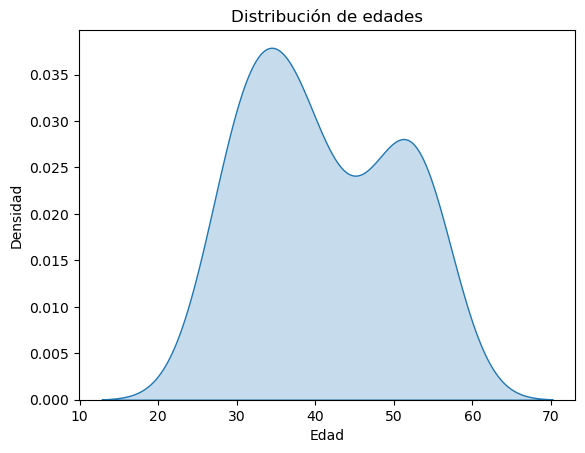

In [100]:
sns.kdeplot(data = df2["age"], shade = True)

plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Densidad")
plt.show()

Apartir de este grafico podemos notar que la mayor cantidad de clientes se encuentra en el rango etario entre 30 y 40 años. Ahora veamos como se relación la edad con el impacto que tiene cada cliente en la campaña. Utilizando un grafico de dispersion con el comando *scatterplot* podemos vizualizar esa relación.

C:\Users\matia\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\matia\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


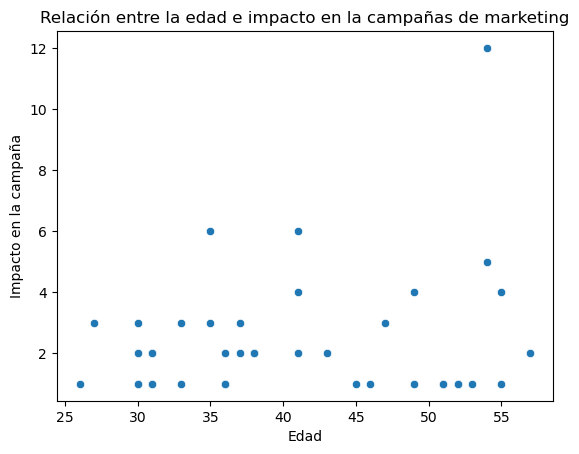

In [101]:
sns.scatterplot(data = df2, x = 'age', y = 'campaign')

plt.title("Relación entre la edad e impacto en la campañas de marketing")
plt.xlabel('Edad')
plt.ylabel('Impacto en la campaña')
plt.show()

En este grafico se puede apreciar que para los rangos etarios mas bajos, entre 30-40 años, el impacto de la campaña varia bastante. Dado que se presentan casos con un impacto considerable y casi con un impacto bajo. Algo que si es importante destacar es que en contraste con el rango etario mayor, 45-55 años, se presetan una mayor cantiad de puntos con bajo impacto pero los puntos de mayor impacto superan a los datos del rango anterior. Ademas de tener un vaor atipico en este rango. El objetivo que tenia al hacer este grafico era ver si habia una correlacion entre esta dos variables y como seguramente ya notaron no es el caso.

## 3.- Unir datasets, explicar el tipo de unión y atributo escogido para la unión 
## Complementar información entre atributos, eliminar atributos innecesarios. Explicar las decisiones tomadas (30 ptos.):

Apoyarse en la documentación de Pandas para los distintos tipos de uniones https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html

Respuesta:
---
    
    
Para combinar las datos de datos utilizamos el comando *merge*, utilizando las columnas *Unnamed : 0* y *id* como sabe. En el *how* le indicamos que queremos una unión de tipo *outer* de tal manera que nos va a juntar las bases de datos sin perder ni una sola columna. Primero se une las bases de datos *df1* y *df2* para unir el resultado con *df3* para obtener una base de datos con toda la información.

In [102]:
df_merge = pd.merge(df1, df2, how = 'outer', on = ['Unnamed: 0', 'id'])

df_final = pd.merge(df_merge, df3, how = 'outer', on = ['Unnamed: 0', 'id'])

df_final.head()

,Unnamed: 0,id,age_x,job,marital,education,default,housing,day_of_week_x,contact_x,...,pdays,previous,poutcome,age_y,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,contact_y
0,2292,2292,51.0,entrepreneur,divorced,university.degree,no,yes,mon,telephone,...,999,1,failure,51.0,-1.8,92.893,-46.2,1.299,5099.1,telephone
1,1536,1536,37.0,management,married,university.degree,no,yes,tue,cellular,...,999,0,nonexistent,37.0,1.4,93.444,-36.1,4.968,5228.1,NO INFO
2,4047,4047,38.0,blue-collar,married,basic.4y,unknown,no,wed,telephone,...,999,0,nonexistent,38.0,1.4,94.465,-41.8,4.959,5228.1,telephone
3,3862,3862,NaN,technician,married,professional.course,no,yes,fri,cellular,...,3,1,success,52.0,-3.4,92.649,-30.1,0.714,5017.5,cellular
4,1340,1340,32.0,admin.,married,university.degree,no,yes,NaN,cellular,...,999,0,nonexistent,NaN,1.4,93.444,-36.1,4.964,5228.1,cellular


Comprobemos como quedo nuestra nueva base de datos con el comando *info()*.

In [103]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age_x           42 non-null     float64
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   day_of_week_x   42 non-null     object 
 9   contact_x       50 non-null     object 
 10  month           50 non-null     object 
 11  day_of_week_y   42 non-null     object 
 12  duration        50 non-null     int64  
 13  campaign        50 non-null     int64  
 14  pdays           50 non-null     int64  
 15  previous        50 non-null     int64  
 16  poutcome        50 non-null     object 
 17  age_y           42 non-null     float

Podemos notar que aquellas columnas que estan presentes en ambas bases de datos se agregaron sin superponerse. Tal que para tener una base de datos limpia vamos a unir ambas columnas en una sola, sin perder información. Para ello se utiliza el comando *combine_first()* para las columnas repetidas. De esta manera el programa revisa celda por celda de la primera columna si posee un dato y en el caso de no tenerlo lo completa con el dato de la otra columna. Repetimos este proceso para las tres columnas repetidas: *age*, *day_of_week* y *contact*.

In [104]:
df_final['age'] = df_final['age_x'].combine_first(df_final['age_y'])
df_final['day_of_week'] = df_final['day_of_week_x'].combine_first(df_final['day_of_week_y'])
df_final['contact'] = df_final['contact_x'].combine_first(df_final['contact_y'])

Una vez se tiene la informacion guardada en una nueva columna, eliminamos las columnas repetidas de nuestra base de datos y revisamos el resultado con el comando *head()*

In [105]:
columnas_delete = ['age_x', 'age_y', 'day_of_week_x', 'day_of_week_y', 'contact_x', 'contact_y']

In [106]:
df_final = df_final.drop(columns = columnas_delete)
df_final.head()

,Unnamed: 0,id,job,marital,education,default,housing,month,duration,campaign,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,age,day_of_week,contact
0,2292,2292,entrepreneur,divorced,university.degree,no,yes,may,231,1,...,1,failure,-1.8,92.893,-46.2,1.299,5099.1,51.0,mon,telephone
1,1536,1536,management,married,university.degree,no,yes,aug,263,2,...,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1,37.0,tue,cellular
2,4047,4047,blue-collar,married,basic.4y,unknown,no,jun,95,2,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,38.0,wed,telephone
3,3862,3862,technician,married,professional.course,no,yes,nov,495,1,...,1,success,-3.4,92.649,-30.1,0.714,5017.5,52.0,fri,cellular
4,1340,1340,admin.,married,university.degree,no,yes,aug,428,4,...,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,32.0,wed,cellular


Para asegurarnos de que no quedan mas datos nulos en esas columnas apliquemos el comando *info* para ver el resultado.

In [107]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   job             50 non-null     object 
 3   marital         50 non-null     object 
 4   education       50 non-null     object 
 5   default         50 non-null     object 
 6   housing         50 non-null     object 
 7   month           50 non-null     object 
 8   duration        50 non-null     int64  
 9   campaign        50 non-null     int64  
 10  pdays           50 non-null     int64  
 11  previous        50 non-null     int64  
 12  poutcome        50 non-null     object 
 13  emp.var.rate    50 non-null     float64
 14  cons.price.idx  50 non-null     float64
 15  cons.conf.idx   50 non-null     float64
 16  euribor3m       50 non-null     float64
 17  nr.employed     50 non-null     float

Si bien tenemos las bases de datos unidas y sin columnas repetidas tenemos algunos datos faltante en la columna de *day_of_week* tal que debemos solucionar ese problema. Además, queremos que esta base de datos tenga el mismo formato que *output.csv*, tal que primero revisemos esta base de datos para hacer la comparación. Para ello utilizamos el comando *head()* para ver la escructura general de la base de datos, con *info()* veremos si hay algun datos nulo, el orden de las columnas y los tipos de datos de posee. Dado que la base de datos posee variables categoricas, estas pueden tener un formato particular, tal que utilizamos el comando *loc()* sobre una muestra para realizar esa exploración.

In [108]:
df_ejemplo = pd.read_csv('output.csv')
df_ejemplo.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,loan,contact,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,2292,2292,51 years,entrepreneur,divorced,university degree,no,yes,no,telephone,...,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,no
1,1536,1536,37 years,management,married,university degree,no,yes,no,cellular,...,2,999,0,not existent,1.4,93.444,-36.1,4.968,5228.1,no
2,4047,4047,38 years,blue-collar,married,basic 4y,,no,no,telephone,...,2,999,0,not existent,1.4,94.465,-41.8,4.959,5228.1,no
3,3862,3862,52 years,technician,married,professional course,no,yes,no,cellular,...,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5,yes
4,1340,1340,32 years,admin.,married,university degree,no,yes,no,cellular,...,4,999,0,not existent,1.4,93.444,-36.1,4.964,5228.1,no


In [109]:
df_ejemplo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age             50 non-null     object 
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   loan            50 non-null     object 
 9   contact         50 non-null     object 
 10  month           50 non-null     object 
 11  day_of_week     50 non-null     object 
 12  duration        50 non-null     int64  
 13  campaign        50 non-null     int64  
 14  pdays           50 non-null     int64  
 15  previous        50 non-null     int64  
 16  poutcome        50 non-null     object 
 17  emp.var.rate    50 non-null     float

In [110]:
variables_categoricas = df_ejemplo.loc[0, ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']]
variables_categoricas

age                     51 years
job                 entrepreneur
marital                 divorced
education      university degree
default                       no
housing                      yes
loan                          no
contact                telephone
month                        may
day_of_week               monday
poutcome                 failure
Name: 0, dtype: object

Lo primero que podemos notar es que el orden no es el mismo, tambien que no hay datos nulos, los datos de la columna edad estan acompañados de la palabra *years*, los días en *day_of_week* no estan abreviados y la presencia de dos columnas nuevas. Respecto a las columnas no hay nada que podamos hacer, sin emebargo el order podemos modificarlo con el siguiente codigo.
En el cual definimos el orden replicando el de base de datos de ejemplo, lo aplicamos a nuestra base de datos y revisamos el resultado con *info()*.

In [111]:
orden = ['Unnamed: 0', 'id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 
         'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx','euribor3m', 'nr.employed']
df_final = df_final[orden]

In [112]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age             50 non-null     float64
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   contact         50 non-null     object 
 9   month           50 non-null     object 
 10  day_of_week     48 non-null     object 
 11  duration        50 non-null     int64  
 12  campaign        50 non-null     int64  
 13  pdays           50 non-null     int64  
 14  previous        50 non-null     int64  
 15  poutcome        50 non-null     object 
 16  emp.var.rate    50 non-null     float64
 17  cons.price.idx  50 non-null     float

Ahora vamos a modificar la columna de *age*. Primero vamos a pasar los datos de tipo *float* a *int* con la primera linea de codigo, donde utilizamos el  comando *astype* para hacer esa conversión. Luego para agregar la palabras *years* utilzamos la siguiente linea del codigo, donde transformamos el datos un *str* y le agregamos la palabra *years* de manera que quede similar a la base de datos de ejemplo. Finalmente revisamos el resultado con el comando *head()*.

In [113]:
df_final['age'] = df_final['age'].astype(int)
df_final['age'] = df_final['age'].astype(str) + ' ' + 'years'
df_final.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university.degree,no,yes,telephone,may,...,231,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,1536,1536,37 years,management,married,university.degree,no,yes,cellular,aug,...,263,2,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
2,4047,4047,38 years,blue-collar,married,basic.4y,unknown,no,telephone,jun,...,95,2,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1
3,3862,3862,52 years,technician,married,professional.course,no,yes,cellular,nov,...,495,1,3,1,success,-3.4,92.649,-30.1,0.714,5017.5
4,1340,1340,32 years,admin.,married,university.degree,no,yes,cellular,aug,...,428,4,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1


Ahora vamos a modificar los datos de *day_of_week*. Para ello hacemos un diccionario con los nombre completos y utilizando el metodo *map* podremos mapear cada nombre abreviado a su versión completa.

In [114]:
dict = {'mon': 'monday', 'tue': 'tuesday', 'wed': 'wednesday', 'thu': 'thusday', 'fri': 'friday', 'sat': 'saturday', 'sun': 'sunday'}
df_final['day_of_week'] = df_final['day_of_week'].map(dict)

Y finalmente para eliminar los datos nulos de la columna *day_of_week* vamos a utilizar la moda de esta columna para completar los datos faltantes con el comando *fillna()*. El motivo detras de esta decision es que al ser una variable categorica no se pueden completar esos datos con el promedio, que en mi opinion seria la forma adecuada de hacerlo para no alterar la estadistica de la base de datos, pero por el tipo de variable que es ese procedimiento no es posible, asi que el alternativa que se me ocurrio fue utilizar la moda. El codigo primero identifica la moda de esa columna y luego completa las celdas vacias con ese valor. Terminamos por utilizar el comando *info()* para revisar el resultado.

In [115]:
moda_days = df_final['day_of_week'].mode()[0]
df_final['day_of_week'].fillna(moda_days, inplace = True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      50 non-null     int64  
 1   id              50 non-null     int64  
 2   age             50 non-null     object 
 3   job             50 non-null     object 
 4   marital         50 non-null     object 
 5   education       50 non-null     object 
 6   default         50 non-null     object 
 7   housing         50 non-null     object 
 8   contact         50 non-null     object 
 9   month           50 non-null     object 
 10  day_of_week     50 non-null     object 
 11  duration        50 non-null     int64  
 12  campaign        50 non-null     int64  
 13  pdays           50 non-null     int64  
 14  previous        50 non-null     int64  
 15  poutcome        50 non-null     object 
 16  emp.var.rate    50 non-null     float64
 17  cons.price.idx  50 non-null     float

Con esto ya tenemos las bases de datos unidas, sin datos nulos y en el formato solicitado en una unica base de datos.

## 4.- Transformar a formato pedido en tabla output.csv, el resultado debe quedar igual a la tabla presentada en el archivo output.csv
## Normalizar los datos numéricos, explicar el tipo de normalización utilizada (recordar que es normalización de datos y no normalización de base de datos, i.e. Standard Scaler, MinMax Scaler, etc.) (30 ptos.):

Apoyarse en la documentación de Scikit-Learn para los distintos tipos de normalización de datos https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

Respuesta:
---
    
    
Para realizar la normalización de los datos numericos, vamos a utilizar el metodo de *MinMaxScaler* dado que cuando aplicamos el metodo *describe()* a cada base de datos notamos que los datos se encontraba descrito entre un valor minimo y un valor maximo lo que motiva la elección de esta metodo de normalización. De tal manera que aplicando dicho metodo de la siguiente manera, primero elegimos las variables a normalizar es decir todas las variables numericas excepto por *Unnamed: 0*, *id* y *age*, luego convocamos el metodo de normalización y lo aplicamos sobre cada una de las columnas para normalizarlas.

In [116]:
variables_numericas = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = MinMaxScaler()
df_final[variables_numericas] = scaler.fit_transform(df_final[variables_numericas])

Utilizando el comando *describe()* vemos como se aplico la normalización sobre las columnas que seleccionamos.

In [117]:
df_final.describe()

,Unnamed: 0,id,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2461.900000,2461.900000,0.169689,0.116364,0.980000,0.120000,0.775833,0.560802,0.414000,0.765179,0.785360
std,1047.344129,1047.344129,0.171590,0.174278,0.141421,0.328261,0.290039,0.257782,0.243723,0.358834,0.263724
min,257.000000,257.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1553.750000,1553.750000,0.077456,0.000000,1.000000,0.000000,0.687500,0.366232,0.258824,0.793725,0.830902
50%,2486.000000,2486.000000,0.109572,0.090909,1.000000,0.000000,0.937500,0.596693,0.311765,0.974011,0.852780
75%,3407.000000,3407.000000,0.197943,0.181818,1.000000,0.000000,1.000000,0.764028,0.629412,0.998244,1.000000
max,4047.000000,4047.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dado como resultado una base de datos con sus variables numericas normalizadas.

## 5.- Generar archivo de salida en formato csv o excel (3 ptos.):


Respuesta:
---
Ya para finalizar, queremos exportar la base de datos resultanto utilizando el comando *to_csv* para generar un archivo *csv* de la base de datos con la información normalizada. Solo para asegurar de que se realizo bien el proceso, voy a importar el archivo resultante y revisarlo con el comando *head()*.    
    


In [119]:
df_final.to_csv('dataframe_final.csv', index = False)

In [121]:
df = pd.read_csv('dataframe_final.csv')
df.head()

,Unnamed: 0,id,age,job,marital,education,default,housing,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,2292,2292,51 years,entrepreneur,divorced,university.degree,no,yes,telephone,may,...,0.136860,0.000000,1.0,1.0,failure,0.333333,0.212425,0.052941,0.140951,0.412033
1,1536,1536,37 years,management,married,university.degree,no,yes,cellular,aug,...,0.163728,0.090909,1.0,0.0,nonexistent,1.000000,0.488477,0.647059,1.000000,1.000000
2,4047,4047,38 years,blue-collar,married,basic.4y,unknown,no,telephone,jun,...,0.022670,0.090909,1.0,0.0,nonexistent,1.000000,1.000000,0.311765,0.997893,1.000000
3,3862,3862,52 years,technician,married,professional.course,no,yes,cellular,nov,...,0.358522,0.000000,0.0,1.0,success,0.000000,0.090180,1.000000,0.003980,0.040109
4,1340,1340,32 years,admin.,married,university.degree,no,yes,cellular,aug,...,0.302267,0.272727,1.0,0.0,nonexistent,1.000000,0.488477,0.647059,0.999063,1.000000
